In [ ]:
# Miscellaneous testing for Eric - others please do not edit - git doesn't play nice with jupyter notebooks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import os, sys
import torch
import optuna
import ruamel.yaml as yaml
import re

In [ ]:

path = "../active/outputs/test/move_data.csv"
results = pd.read_csv(path,index_col=0)
results["cumulative_reward"] = results.reward.cumsum()
fig = plt.figure(constrained_layout=False,figsize=(13,6))
ax=sns.lineplot(data=results,x=results.index, y = "cumulative_reward")
ax2 = plt.twinx()
sns.lineplot(data=results.epsilon, color="b", ax=ax2)

path2 = "../active/outputs/test/episode_data.csv"
episode_results = pd.read_csv(path2,index_col=0)
fig2 = plt.figure(constrained_layout=False,figsize=(13,6))
ax3 = sns.lineplot(data=episode_results,x=episode_results.index, y = episode_results.rolling(10).mean().reward)

path3 = "../active/outputs/test/loss_data.csv"
loss_results = pd.read_csv(path3,index_col=0)
fig3 = plt.figure(constrained_layout=False,figsize=(13,6))
ax4 = sns.lineplot(data=loss_results,x=loss_results.index, y = loss_results.loss)

In [ ]:
# Multi run results
#path = "../active/outputs/test/other_clockwiseTwoFree"
#path = "../active/outputs/test/other_clockwiseTwoFreeAlt"
#path = "../active/outputs/test/other_clockwiseZeroStart"
path = "../active/outputs/test/other_1_1_shape_4m"
#path = "../active/outputs/test/other_1_1_color_4m"

fig = plt.figure(constrained_layout=False,figsize=(13,6))
for i in np.arange(0,8):
    run_path = path + "/"+str(i)+"/episode_data.csv"
    episode_results = pd.read_csv(run_path)
    sns.lineplot(data=episode_results,x=episode_results.index, y = episode_results.rolling(10).mean().reward)
fig2= plt.figure(constrained_layout=False,figsize=(13,6))
for i in np.arange(0,8):
    run_path = path + "/"+str(i)+"/move_data.csv"
    results = pd.read_csv(run_path)
    results["cumulative_reward"] = results.reward.cumsum()
    sns.lineplot(data=results,x=results.index, y = "cumulative_reward")
episode_results.head()

In [ ]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [ ]:
study_name = "naive_n8_Rule_001_8reps"
storage_name = "sqlite:///../active/outputs/tuning/{}.db".format(study_name)
study = optuna.study.load_study(study_name=study_name,storage=storage_name)

In [ ]:
study.best_params

In [ ]:
plot_optimization_history(study)

In [ ]:
plot_parallel_coordinate(study)

In [ ]:
plot_contour(study)

In [ ]:
#import lightgbm as lgb
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split


In [ ]:
plot_param_importances(study)

In [ ]:
#print(np.ravel_multi_index((o_row,o_col,b_index),(6,6,4)))
print(np.unravel_index(72, (6,6,4)))

In [22]:
class SafeLoaderIgnoreUnknown(yaml.SafeLoader):
    def ignore_unknown(self, node):
        return None 

SafeLoaderIgnoreUnknown.add_constructor(None, SafeLoaderIgnoreUnknown.ignore_unknown)

# Location of rule runs
rule_runs_path = "/Users/eric/repos/gohr/active/outputs/rule_runs/"
#runs_to_analyze = ["initial_run_n2","initial_run_n4","initial_run_n6","initial_run_n8"]
runs_to_analyze = ["naive_bs_as_n2","naive_bs_as_n4","naive_bs_as_n6","naive_bs_as_n8"]
#runs_to_analyze = ["debug_initial_run_n6"]
#runs_to_analyze = ["initial_run_naive_n2","initial_run_naive_n4","initial_run_naive_n6","initial_run_naive_n8","naive_bs_as_n2","naive_bs_as_n4","naive_bs_as_n6","naive_bs_as_n8"]
#runs_to_analyze = ["debug_initial_run_n6"]
#runs_to_analyze = ["misc_initial_run_naive_sparse_n2","misc_initial_run_naive_dense_n2","initial_run_n8","initial_run_naive_n8"]
#runs_to_analyze=["initial_run_n8","initial_run_naive_n8"]
#loader = yaml.SafeLoader
# loader.add_implicit_resolver(
# u'tag:yaml.org,2002:float',
# re.compile(u'''^(?:
#     [-+]?(?:[0-9][0-9_]*)\\.[0-9_]*(?:[eE][-+]?[0-9]+)?
# |[-+]?(?:[0-9][0-9_]*)(?:[eE][-+]?[0-9]+)
# |\\.[0-9_]+(?:[eE][-+][0-9]+)?
# |[-+]?[0-9][0-9_]*(?::[0-5]?[0-9])+\\.[0-9_]*
# |[-+]?\\.(?:inf|Inf|INF)
# |\\.(?:nan|NaN|NAN))$''', re.X),
# list(u'-+0123456789.'))

# Create lists that will hold dataframes for concatenation
episode_df_list = []
move_df_list = []
terminal_results_list = []

# Loop over the specified rule runs
for run in runs_to_analyze:
    #print(run)
    # Form complete run path
    run_path = rule_runs_path+run
    #print(run_path)
    # Get the experiments for that run (each one is a set of trials for a particular rule)
    experiments = [name for name in os.listdir(run_path) if name!=".DS_Store"]
    #print(experiments)
    # Loop over the experiments
    for experiment in experiments:
        # Get the neptune id
        neptune_trial = experiment.split("_")[0]
        # String length may vary
        trial_str_length = len(neptune_trial)
        # Rule is everything after the neptune id and an _ character
        rule_name = experiment[trial_str_length+1:]
        #print(neptune_trial)
        #print(rule_name)
        # For complete experiment path
        experiment_path = os.path.join(run_path,experiment)
        #print(experiment_path)
        trials = [name for name in os.listdir(experiment_path) if name!=".DS_Store"]
        #if not(len(trials)==56):
        #    print(run, experiment, len(trials))
        #print(trials)
        for trial in trials:
            trial_path = os.path.join(experiment_path,trial)
            # Get parameters
            yaml_path = os.path.join(trial_path,"data.yaml")
            with open(yaml_path, 'r') as param_file:
                args = yaml.load(param_file, Loader=SafeLoaderIgnoreUnknown)
                featurization =args["FEATURIZATION"]
            # Import episodic data and process relevant columns
            episodic_data_path = os.path.join(trial_path,"episode_data.csv")
            #move_data_path = os.path.join(trial_path,"move_data.csv")
            trial_results = pd.read_csv(episodic_data_path,index_col=0)
            #move_results = pd.read_csv(move_data_path,index_col=0,usecols=['episode','time','reward'])
            # Episode processing
            trial_results["rule"]=rule_name
            trial_results["params"]=run
            trial_results["memory"]=int(run[-1])
            trial_results["experiment_id"]=neptune_trial
            trial_results["trial"]=trial
            trial_results["featurization"]=featurization
            trial_results["ep_error"]=-1*trial_results["reward"]
            trial_results["cumulative_error"] = trial_results.ep_error.cumsum()
            terminal_results_list.append(trial_results.iloc[-1].to_frame().transpose())
            test_ser = trial_results.iloc[-1]
            episode_df_list.append(trial_results)
            # # Move processing
            # move_results['rule']=rule_name
            # move_results['params']=run
            # move_results['memory']=int(run[-1])
            # #move_results['experiment_id']=neptune_trial
            # move_results['trial']=trial
            # move_results['move'] = 

# Concatenate everything into one dataframe
episode_results_df = pd.concat(episode_df_list,ignore_index=True)
terminal_results_df = pd.concat(terminal_results_list,ignore_index=True)

In [24]:
bs_as_df = episode_results_df.copy()

In [2]:
# CLUSTER IMPORT
class SafeLoaderIgnoreUnknown(yaml.SafeLoader):
    def ignore_unknown(self, node):
        return None 

SafeLoaderIgnoreUnknown.add_constructor(None, SafeLoaderIgnoreUnknown.ignore_unknown)

# Location of rule runs
rule_runs_path = "/Users/eric/repos/gohr/active/outputs/cluster_runs/"
#runs_to_analyze = ["initial_run_n2","initial_run_n4","initial_run_n6","initial_run_n8"]
runs_to_analyze = ["naive_bd_ad_n2","naive_bd_ad_n4","naive_bd_ad_n6","naive_bd_ad_n8",
                   "naive_bs_ad_n2","naive_bs_ad_n4","naive_bs_ad_n6","naive_bs_ad_n8",
                   "naive_bd_as_n2","naive_bd_as_n4","naive_bd_as_n6","naive_bd_as_n8",
                   "naive_bs_as_n2","naive_bs_as_n4","naive_bs_as_n6","naive_bs_as_n8",
                   "naive_bsd_asd_n2","naive_bsd_asd_n4","naive_bsd_asd_n6","naive_bsd_asd_n8"]
#runs_to_analyze = ["debug_initial_run_n6"]
#runs_to_analyze = ["initial_run_naive_n2","initial_run_naive_n4","initial_run_naive_n6","initial_run_naive_n8","naive_bs_as_n2","naive_bs_as_n4","naive_bs_as_n6","naive_bs_as_n8"]
#runs_to_analyze = ["debug_initial_run_n6"]
#runs_to_analyze = ["misc_initial_run_naive_sparse_n2","misc_initial_run_naive_dense_n2","initial_run_n8","initial_run_naive_n8"]
#runs_to_analyze=["initial_run_n8","initial_run_naive_n8"]
#loader = yaml.SafeLoader
# loader.add_implicit_resolver(
# u'tag:yaml.org,2002:float',
# re.compile(u'''^(?:
#     [-+]?(?:[0-9][0-9_]*)\\.[0-9_]*(?:[eE][-+]?[0-9]+)?
# |[-+]?(?:[0-9][0-9_]*)(?:[eE][-+]?[0-9]+)
# |\\.[0-9_]+(?:[eE][-+][0-9]+)?
# |[-+]?[0-9][0-9_]*(?::[0-5]?[0-9])+\\.[0-9_]*
# |[-+]?\\.(?:inf|Inf|INF)
# |\\.(?:nan|NaN|NAN))$''', re.X),
# list(u'-+0123456789.'))

# Create lists that will hold dataframes for concatenation
episode_df_list = []
move_df_list = []
terminal_results_list = []

# Loop over the specified rule runs
for run in runs_to_analyze:
    #print(run)
    # Form complete run path
    run_path = rule_runs_path+run
    #print(run_path)
    # Get the experiments for that run (each one is a set of trials for a particular rule)
    experiments = [name for name in os.listdir(run_path) if name!=".DS_Store"]
    #print(experiments)
    # Loop over the experiments
    for experiment in experiments:
        # Get the neptune id
        cluster_trial = experiment.split("_")[0]
        cluster_process = experiment.split("_")[1]
        cluster_id = cluster_trial+"_"+cluster_process
        # String length may vary
        id_str_length = len(cluster_id)
        # Rule is everything after the neptune id and a _ character
        rule_name = experiment[id_str_length+1:]
        #print(neptune_trial)
        #print(rule_name)
        # For complete experiment path
        experiment_path = os.path.join(run_path,experiment)
        #print(experiment_path)
        trials = [name for name in os.listdir(experiment_path) if name!=".DS_Store"]
        #if not(len(trials)==56):
        #    print(run, experiment, len(trials))
        #print(trials)
        for trial in trials:
            trial_path = os.path.join(experiment_path,trial)
            # Get parameters
            yaml_path = os.path.join(trial_path,"data.yaml")
            with open(yaml_path, 'r') as param_file:
                args = yaml.load(param_file, Loader=SafeLoaderIgnoreUnknown)
                featurization =args["FEATURIZATION"]
            # Import episodic data and process relevant columns
            episodic_data_path = os.path.join(trial_path,"episode_data.csv")
            #move_data_path = os.path.join(trial_path,"move_data.csv")
            trial_results = pd.read_csv(episodic_data_path)
            #move_results = pd.read_csv(move_data_path,index_col=0,usecols=['episode','time','reward'])
            # Episode processing
            trial_results["rule"]=rule_name
            trial_results["params"]=run
            trial_results["memory"]=int(run[-1])
            trial_results["experiment_id"]=cluster_id
            trial_results["trial"]=trial
            trial_results["featurization"]=featurization
            trial_results["ep_error"]=-1*trial_results["reward"]
            trial_results["cumulative_error"] = trial_results.ep_error.cumsum()
            terminal_results_list.append(trial_results.iloc[-1].to_frame().transpose())
            test_ser = trial_results.iloc[-1]
            episode_df_list.append(trial_results)
            # # Move processing
            # move_results['rule']=rule_name
            # move_results['params']=run
            # move_results['memory']=int(run[-1])
            # #move_results['experiment_id']=neptune_trial
            # move_results['trial']=trial
            # move_results['move'] = 
            
# Concatenate everything into one dataframe
episode_results_df = pd.concat(episode_df_list,ignore_index=True)
terminal_results_df = pd.concat(terminal_results_list,ignore_index=True)

In [ ]:
move_results_df.head()

In [ ]:
test = """4148793254 4288201859 2473703529 1428861611 2831548506 3943176004
 3347237162  608173320 2950202257 3897940168 3194499763 1614902153
  813528617  329083533 2616487268 1823984054 1658298428 2599382809
 1070468359  742683208  234982630 2509808768 1163232148 2479987916
 1938492685  900298918 3290149243 3212845959  784673452 1327206278
 2907579944 1619867360 3659720024 1416800317  743350924 3567967713
 1039809454  885371085 2193164054 1740190550 1677789792 1401485263
 1232891735 2005854254 2993479418 3838304243 1891956710 2916818526
 2801912702 2722489994 2567908538 1986337836  900093547 4220839722
  302012116 4107991468"""
test_vec = test.split()
print(test_vec)

In [27]:
bs_as_df.head()

,episode,reward,rule,params,memory,experiment_id,trial,featurization,ep_error,cumulative_error
0,0,-9.0,clockwiseTwoFree,naive_bs_as_n2,2,GOH1-352,50,NAIVE_N_BS_AS,9.0,9.0
1,1,-11.0,clockwiseTwoFree,naive_bs_as_n2,2,GOH1-352,50,NAIVE_N_BS_AS,11.0,20.0
2,2,-9.0,clockwiseTwoFree,naive_bs_as_n2,2,GOH1-352,50,NAIVE_N_BS_AS,9.0,29.0
3,3,-9.0,clockwiseTwoFree,naive_bs_as_n2,2,GOH1-352,50,NAIVE_N_BS_AS,9.0,38.0
4,4,-17.0,clockwiseTwoFree,naive_bs_as_n2,2,GOH1-352,50,NAIVE_N_BS_AS,17.0,55.0


In [28]:
episode_results_df.head()

,episode,reward,cluster_id,rule,params,memory,experiment_id,trial,featurization,ep_error,cumulative_error
0,0,-13.0,10726599_117_0,bottomLeft_then_topRight,naive_bd_ad_n2,2,10726599_117,0,NAIVE_N_BD_AD,13.0,13.0
1,1,-11.0,10726599_117_0,bottomLeft_then_topRight,naive_bd_ad_n2,2,10726599_117,0,NAIVE_N_BD_AD,11.0,24.0
2,2,-15.0,10726599_117_0,bottomLeft_then_topRight,naive_bd_ad_n2,2,10726599_117,0,NAIVE_N_BD_AD,15.0,39.0
3,3,-30.0,10726599_117_0,bottomLeft_then_topRight,naive_bd_ad_n2,2,10726599_117,0,NAIVE_N_BD_AD,30.0,69.0
4,4,-36.0,10726599_117_0,bottomLeft_then_topRight,naive_bd_ad_n2,2,10726599_117,0,NAIVE_N_BD_AD,36.0,105.0


In [34]:
# For case where separate imports are needed
episode_results_df.drop(labels=['cluster_id'],axis=1,inplace=True)
cat_list = [episode_results_df, bs_as_df]
episode_results_df = pd.concat(cat_list,ignore_index=True)


In [ ]:
episode_results_df.to_csv("naive_and_sparse_episodic_data.csv")

In [ ]:
test_df = pd.DataFrame(test_ser).transpose()
test_df.head()

In [ ]:
for i in range(len(rules_list)):
    sub_dict = rules_list[i]
    sub_list = sub_dict["rules"]
    name = sub_dict["name"]
    fig=plt.figure(figsize=(6*len(sub_list),6))
    g=sns.FacetGrid(data=terminal_results_df.query("rule in @sub_list"),col="featurization")
    g.map(sns.boxplot,"rule","cumulative_error",hue=terminal_results_df.query("rule in @sub_list")["memory"],color="memory")
    fig.show()

In [3]:
complete_list = episode_results_df.rule.unique()
rules_list = [#{"name":"all_rules","rules":complete_list,"y":[0,4000]},
                {"name":"shape_rules","rules":["1_1_shape_4m","1_1_shape_3m_cua","1_2_shape_4m"],"y":[0,2500]},
                {"name":"color_rules","rules":["1_1_color_4m","1_1_color_3m_cua","1_2_color_4m"],"y":[0,2500]}, 
                {"name":"clockwise_rules","rules":["clockwiseZeroStart","clockwiseTwoFreeAlt","clockwiseTwoFree"],"y":[0,4000]},
                {"name":"quadrant_rules","rules":["quadrantNearby","quadrantNearbyTwoFree"],"y":[0,400]},
                {"name":"bottom_top_rules","rules":["bottomLeft_then_topRight","bottom_then_top"],"y":[0,1500]}]

# complete_list = episode_results_df.rule.unique()
# rules_list = [{"name":"all_rules","rules":complete_list,"y":[0,5000]},
#                 {"name":"shape_rules","rules":["1_1_shape_4m","1_1_shape_3m_cua","1_2_shape_4m"],"y":[0,3500]},
#                 {"name":"color_rules","rules":["1_1_color_4m","1_1_color_3m_cua","1_2_color_4m"],"y":[0,3500]}, 
#                 {"name":"clockwise_rules","rules":["clockwiseZeroStart","clockwiseTwoFreeAlt","clockwiseTwoFree"],"y":[0,4000]},
#                 {"name":"quadrant_rules","rules":["quadrantNearby","quadrantNearbyTwoFree"],"y":[0,600]},
#                 {"name":"bottom_top_rules","rules":["bottomLeft_then_topRight","bottom_then_top","topRight_then_bottomLeft","topLeft_then_bottomRight"],"y":[0,2500]}]
#complete_list = episode_results_df.rule.unique()
#rules_list = [{"name":"shape_rules","rules":["1_1_shape_4m"],"y":[0,3000]}]
#complete_list = episode_results_df.rule.unique()
#rules_list = [{"name":"all_rules","rules":complete_list,"y":[0,10000]},
#                {"name":"clockwise_rules","rules":["clockwiseTwoFree"],"y":[0,10000]}]

In [ ]:
terminal_results_df.replace(to_replace={'1_1_shape_4m':'SM','1_2_shape_4m':'SM2O','1_1_shape_3m_cua':'SM1F','clockwiseZeroStart':'C','clockwiseTwoFreeAlt':'CAF','clockwiseTwoFree':'C2F'},inplace=True)

episode_results_df.replace(to_replace={'1_1_shape_4m':'SM','1_2_shape_4m':'SM2O','1_1_shape_3m_cua':'SM1F','clockwiseZeroStart':'C','clockwiseTwoFreeAlt':'CAF','clockwiseTwoFree':'C2F'},inplace=True)

rules_list = [
    {"name":"shape_rules","rules":["SM","SM1F","SM2O"],"y":[0,3500]},
    {"name":"clockwise_rules","rules":["C","CAF","C2F"],"y":[0,4000]}
]
rules_list = ['SM','SM1F','SM2O','C','CAF','C2F']

In [ ]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid")
import matplotlib.gridspec as gridspec
df1 = episode_results_df.query("rule in @rules_list and featurization=='NAIVE_N_DENSE' and memory==6")
df2 = terminal_results_df.query("rule in @rules_list and featurization=='NAIVE_N_DENSE' and memory==6")
#df2 = terminal_results_df.query("rule in @rules_list[1]['rules'] and featurization=='NAIVE_N_DENSE' and memory==6")
# create grid for different subplots
#fig = plt.Figure(figsize=(20,10))
#spec = gridspec.GridSpec(ncols=2, nrows=1,
#                         width_ratios=[2, 1], wspace=0.5,
#                         hspace=0.5, sharey=True)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(23,13),sharey=True,gridspec_kw={'width_ratios': [1.5, 1],'wspace':0,'hspace':0})
#ax=sns.ecdfplot(data=df1,x="cumulative_error",hue="rule",hue_order=rules_list)
#ax = sns.lineplot(data=df1,x="cumulative_error",y="rule",order=rules_list)
sns.lineplot(data=df1,ax=ax1,y="cumulative_error",x="episode",hue="rule", errorbar=("ci",95),estimator=np.median,n_boot=100,hue_order=rules_list,legend=False,linewidth=2)
sns.boxplot(data=df2,ax=ax2,y="cumulative_error",x="rule",order=rules_list)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_ylabel("")
ax1.set_xlabel('Episode')
ax2.set_xlabel('Rule')
ax1.set_ylabel("Cumulated Errors")
ax1.set_xticks([0,500,1000,1500,2000])
ax2.set_xticklabels(rules_list)
#ax.set_ylim(0,1.1)
#ax.set_xlabel("Cumulative Errors over 2000 Episodes")
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.align_xlabels()
plt.tight_layout()
plt.savefig('ml_combined.png',dpi=300,facecolor='w')

In [ ]:
# Mann Whitney Testing
from scipy.stats import mannwhitneyu
#mw_df = terminal_results_df.query("rule in @rules_list and featurization=='NAIVE_N_DENSE' and memory==6").copy()
mw_df = terminal_results_df.query("featurization=='NAIVE_N_BS_AS' and memory==8").copy()


In [ ]:
mw_df.head()

In [ ]:
rule2 = "bottomLeft_then_topRight"
rule1 = "bottom_then_top"
data1=mw_df.query("rule == @rule1")["cumulative_error"].to_numpy(dtype=int)
print(data1)
data2=mw_df.query("rule == @rule2")["cumulative_error"].to_numpy(dtype=int)
print(data2)
u,p_u = mannwhitneyu(data1,data2, method="asymptotic",alternative="greater")
print(len(data1),len(data2))
print(u,p_u)


In [ ]:
# Create a figure grid
# fig = plt.figure(figsize=(30,35))
# gs = GridSpec(nrows = len(rules_list),ncols=1)
steps=[2,4,6,8]

for i in range(len(rules_list)):
    sub_dict = rules_list[i]
    sub_list = sub_dict["rules"]
    name = sub_dict["name"]
    df1 = terminal_results_df.query("rule in @sub_list and featurization=='NAIVE_N'")
    df2 = terminal_results_df.query("rule in @sub_list and featurization=='NAIVE_N_BS_AS'")
    #df2 = terminal_results_df.query("rule in @sub_list and featurization=='NAIVE_N_DENSE'")
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8*len(sub_list),8),sharey=True)
    sns.boxplot(data=df1,ax=ax1,y="cumulative_error",x="rule",hue="memory",order=sub_list,hue_order=steps)
    ax1.set_title('NAIVE_N')
    sns.boxplot(data=df2,ax=ax2,y="cumulative_error",x="rule",hue="memory",order=sub_list,hue_order=steps)
    #ax2.set_title('NAIVE_N_DENSE')
    ax2.set_title('NAIVE_N_BS_AS')
    fig.suptitle(name)
    #plt.figure(figsize=(3*len(sub_list),5))
    #g=sns.FacetGrid(data=terminal_results_df.query("rule in @sub_list"),col="featurization")
    #g.map(sns.boxplot,"rule","cumulative_error")
    #sns.boxplot(data=terminal_results_df.query("rule in @sub_list"),y="cumulative_error",x="rule",hue="memory")
    #fig.show()

In [5]:
episode_results_df.head()

,episode,reward,cluster_id,rule,params,memory,experiment_id,trial,featurization,ep_error,cumulative_error
0,0,-13.0,10726599_117_0,117_bottomLeft_then_topRight,naive_bd_ad_n2,2,10726599,0,NAIVE_N_BD_AD,13.0,13.0
1,1,-11.0,10726599_117_0,117_bottomLeft_then_topRight,naive_bd_ad_n2,2,10726599,0,NAIVE_N_BD_AD,11.0,24.0
2,2,-15.0,10726599_117_0,117_bottomLeft_then_topRight,naive_bd_ad_n2,2,10726599,0,NAIVE_N_BD_AD,15.0,39.0
3,3,-30.0,10726599_117_0,117_bottomLeft_then_topRight,naive_bd_ad_n2,2,10726599,0,NAIVE_N_BD_AD,30.0,69.0
4,4,-36.0,10726599_117_0,117_bottomLeft_then_topRight,naive_bd_ad_n2,2,10726599,0,NAIVE_N_BD_AD,36.0,105.0


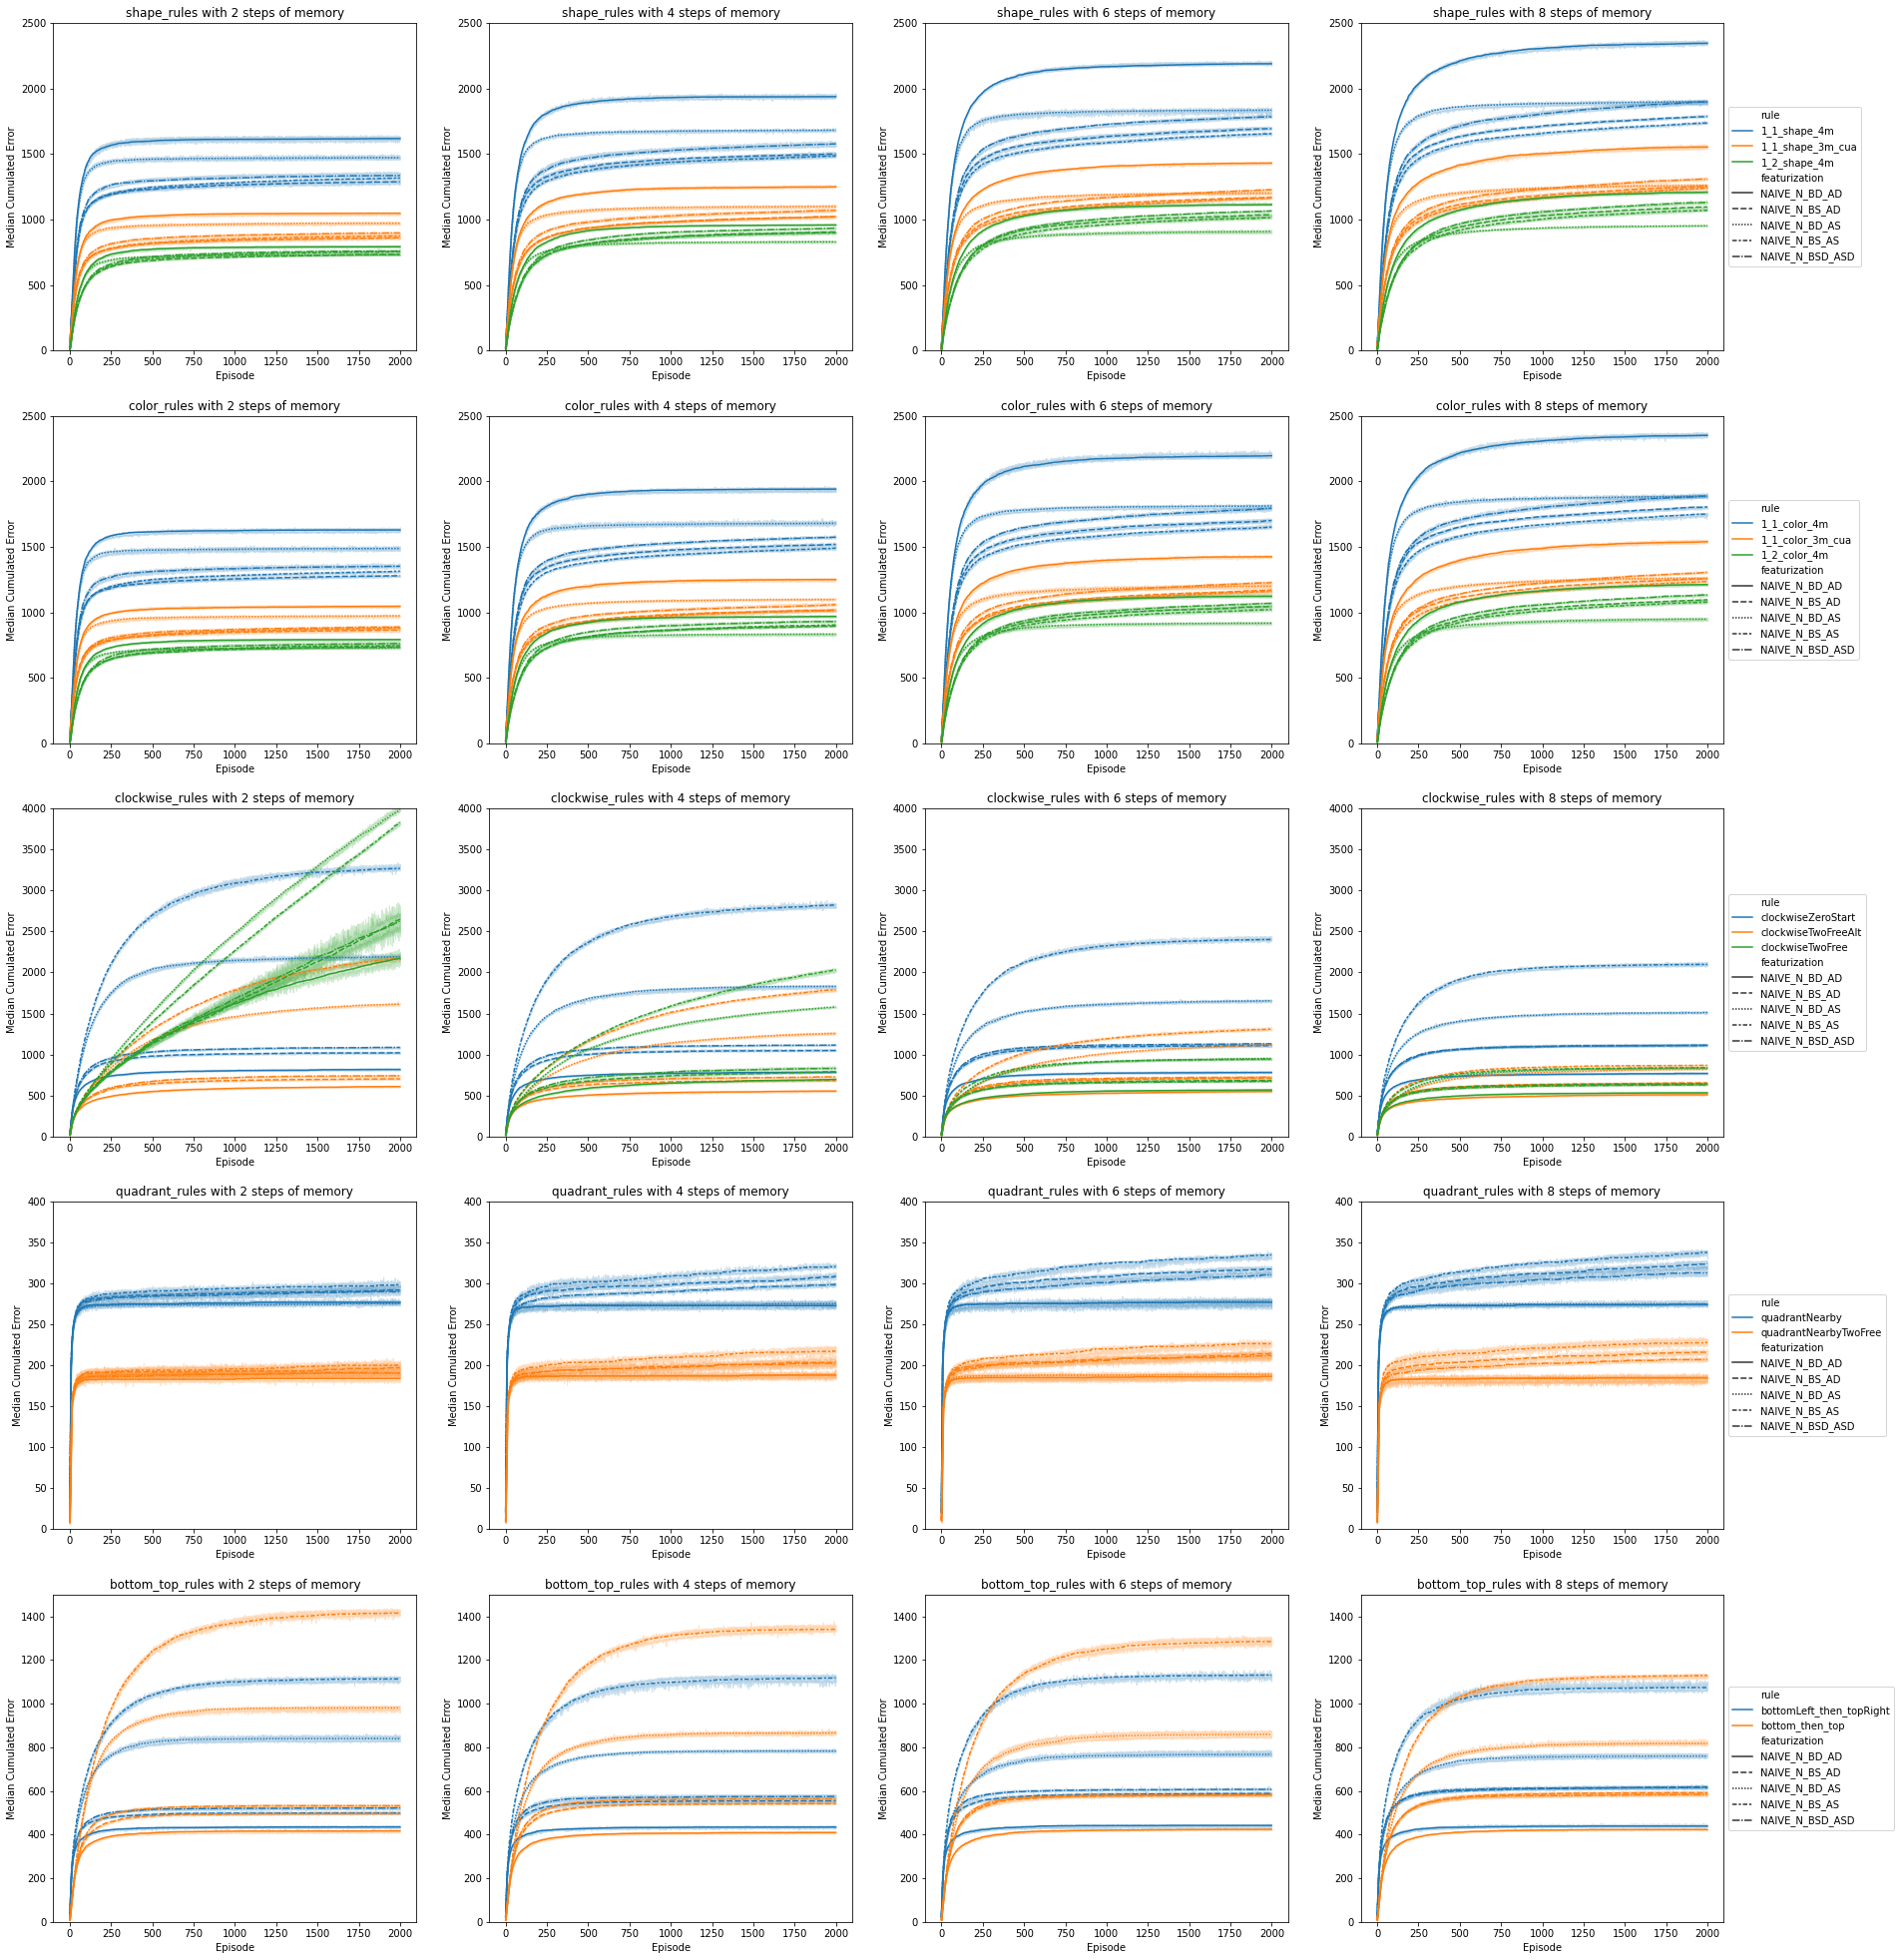

In [6]:
# Create a figure grid
fig = plt.figure(figsize=(30,35))
steps = [2,4,6,8]
#fig = plt.figure(figsize=(5,10))
#steps=[2]
gs = GridSpec(nrows = len(rules_list),ncols=len(steps))
#sty_order = ["NAIVE_N_BD_AD","NAIVE_N_BS_AD","NAIVE_N_BD_AS"]
sty_order = ["NAIVE_N_BD_AD","NAIVE_N_BS_AD","NAIVE_N_BD_AS","NAIVE_N_BS_AS", "NAIVE_N_BSD_ASD"]
for idx,step in enumerate(steps):
    results_df = episode_results_df[episode_results_df.memory==step]
    for i in range(len(rules_list)):
        sub_dict = rules_list[i]
        sub_list = sub_dict["rules"]
        name = sub_dict["name"]
        ax = fig.add_subplot(gs[i,idx])
        if not(step==8):
            ax=sns.lineplot(data=results_df.query("rule in @sub_list"),y="cumulative_error",x="episode", errorbar=("ci",95),estimator=np.median,n_boot=10,hue="rule",hue_order=sub_list,style="featurization",style_order=sty_order,legend=False)
            #ax=sns.lineplot(data=results_df.query("rule in @sub_list"),y="cumulative_error",x="episode", errorbar=("ci",95),estimator=np.median,n_boot=100,hue="rule",hue_order=sub_list,legend=False)
        else:
            #ax=sns.lineplot(data=results_df.query("rule in @sub_list"),y="cumulative_error",x="episode", errorbar=("ci",95),estimator=np.median,n_boot=100,hue="rule",hue_order=sub_list)
            ax=sns.lineplot(data=results_df.query("rule in @sub_list"),y="cumulative_error",x="episode", errorbar=("ci",95),estimator=np.median,n_boot=10,hue="rule",hue_order=sub_list,style="featurization",style_order=sty_order)
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_title(name+" with {} steps of memory".format(str(step)))
        ax.set_ylim(sub_dict["y"])
        ax.set_ylabel("Median Cumulated Error")
        ax.set_xlabel("Episode")

plt.savefig('ml_5_ways.pdf',bbox_inches='tight',facecolor='w')

In [ ]:
episode_results_df["trial"]=episode_results_df["trial"].astype("int64")
#print(type(test.cumulative_error))
# Create a figure grid
fig = plt.figure(figsize=(30,35))
steps = [2,4,6,8]
#fig = plt.figure(figsize=(5,10))
#steps=[2]
gs = GridSpec(nrows = len(rules_list),ncols=len(steps))

for idx,step in enumerate(steps):
    results_df = episode_results_df[episode_results_df.memory==step]
    for i in range(len(rules_list)):
        sub_dict = rules_list[i]
        sub_list = sub_dict["rules"]
        name = sub_dict["name"]
        ax = fig.add_subplot(gs[i,idx])
        if not(step==8):
            ax=sns.lineplot(data=results_df.query("rule in @sub_list"),linewidth=1,units="trial",y="cumulative_error",x="episode",estimator=None,hue="rule",hue_order=sub_list,style="featurization",style_order=["NAIVE_N","NAIVE_N_BS_AS"],legend=False)
        else:
            ax=sns.lineplot(data=results_df.query("rule in @sub_list"),linewidth=1,units="trial",y="cumulative_error",x="episode",estimator=None,hue="rule",hue_order=sub_list,style="featurization",style_order=["NAIVE_N","NAIVE_N_BS_AS"])
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_title(name+" with {} steps of memory".format(str(step)))
        ax.set_ylim(sub_dict["y"])

In [ ]:
debug_df = episode_results_df[episode_results_df.rule=="1_1_color_3m_cua"].copy()
debug_df = debug_df[debug_df.memory==6]
debug_df.head()

In [ ]:
debug_df.loc[debug_df.cumulative_error.idxmax()]

In [ ]:
debug_df_run = debug_df[debug_df.trial==30].copy()
debug_df_run.to_csv("debugging_run.csv")

In [ ]:
# Create a figure grid
fig = plt.figure(figsize=(7,10))
steps = [8]
#fig = plt.figure(figsize=(5,10))
#steps=[2]
gs = GridSpec(nrows = len(rules_list),ncols=len(steps))

for idx,step in enumerate(steps):
    results_df = episode_results_df[episode_results_df.memory==step]
    for i in range(len(rules_list)):
        sub_dict = rules_list[i]
        sub_list = sub_dict["rules"]
        name = sub_dict["name"]
        ax = fig.add_subplot(gs[i,idx])
        if not(step==8):
            ax=sns.lineplot(data=results_df.query("rule in @sub_list"),y="cumulative_error",x="episode",hue="featurization",estimator=None,hue_order=["NAIVE_N","NAIVE_N_DENSE"],legend=False)
        else:
            ax=sns.lineplot(data=results_df.query("rule in @sub_list"),y="cumulative_error",x="episode",hue="featurization",estimator=None,hue_order=["NAIVE_N","NAIVE_N_DENSE"])
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_title(name+" with {} steps of memory".format(str(step)))
        ax.set_ylim(sub_dict["y"])